In [13]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
from IPython.display import Image as ShowImage
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as mfm
import matplotlib.gridspec as gridspec
import matplotlib.ticker as plticker

### 目标图表形式

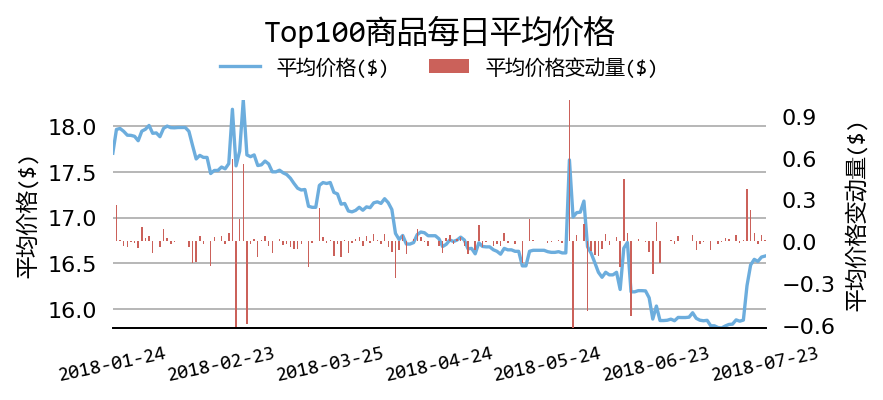

In [17]:
ShowImage('./source/twinx.png')

In [4]:
data = pd.read_csv('./source/data_4.csv', index_col=0)

In [5]:
data.head()

,日期,平均价格($),平均价格变动量($)
0,2018-01-24,17.702880,NaN
1,2018-01-25,17.962366,0.259486
2,2018-01-26,17.972838,0.010472
3,2018-01-27,17.941423,-0.031415
4,2018-01-28,17.899536,-0.041886


### 继承模板
观察多线图和上一章中柱形图的差异，可以发现以下结构有不同：

- 画图方式：由折线图和柱状图组成
- Tick显示：显示日期
- Legend在上侧
- y轴的Major tick label左右侧都有，而且还有y轴Label

所以在这些部分我们需要进行相关的自定义

### 首先我们定义双轴的通用Image类

In [6]:
%run Images.py
class ImageTwinx(Image):
    def __init__(self, title=None, labels=None, data=None, image_path=None, xticks_rotation=40, 
                 legend_name=[], y2=None, title_y=1.2, ylabel_show=True):
        self.ylabel_show = ylabel_show
        self.legend_name = legend_name
        self.marker_style = dict(color=self.default_colors['blue'], linestyle='-')
        # 副轴所用数据
        self.y2 = y2
        super(ImageTwinx, self).__init__(title=title, labels=labels, data=data,
        image_path=image_path, xticks_rotation=xticks_rotation, title_y=title_y, legend_name=legend_name)
     
    
    def config_add(self):
        self.set_ylabel()

    # 此处使用Legend作为y轴的Label
    def set_ylabel(self):
        if self.ylabel_show:
            self.ax.set_ylabel(self.legend_name[0], fontproperties=self.ylable_font)
            self.ax2.set_ylabel(self.legend_name[1], fontproperties=self.ylable_font)

    # 添加副轴，要加入init函数中set_xticks之后，作为初始化的一部分
    def add_ax(self):
        self.ax2 = self.ax.twinx()

    def plot(self):
        self.ax.plot(self.x, self.y, label=self.legend_name[0], **self.marker_style)
        self.ax2.bar(self.x, self.y2, 0.4, zorder=3, label=self.legend_name[1], color=self.default_colors['red'])
        
    def set_spines(self):
        for _ax in [self.ax, self.ax2]:
            _ax.margins(0) # 设置留白
            _ax.spines['right'].set_visible(False)
            _ax.spines['top'].set_visible(False)
            _ax.spines['left'].set_visible(False)
    def set_tick_marks(self):
        self.ax.tick_params(axis='both', which='both', bottom=False, top=False, 
            labelbottom=True, left=False, right=False, labelleft=True)
        self.ax2.tick_params(axis='both', which='both', bottom=False, top=False, 
            labelbottom=True, left=False, right=False)

    def add_legend(self):
        if not (self.legend_name is None):
            if len(self.legend_name) == 2:
                lines1, labels1 = self.ax.get_legend_handles_labels()
                lines2, labels2 = self.ax2.get_legend_handles_labels()
                self.ax.legend(lines1+lines2, labels1+labels2, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.27), prop=self.legend_font, frameon=False)

有双轴需要设置副轴grid


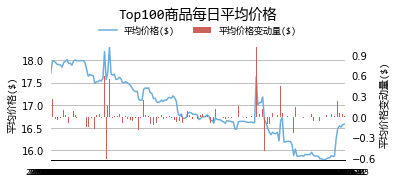

In [7]:
image = ImageTwinx(data=data[u'平均价格($)'],
                        y2=data[u'平均价格变动量($)'],
                        labels=data[u'日期'],
                        title=u'Top100商品每日平均价格',
                        legend_name=[u'平均价格($)', 
                                     u'平均价格变动量($)'],
                        xticks_rotation=0
                        )

image.init()
image.fig

此时图表大部分已经符合要求，但是X轴的ticks需要设置下显示方式，对于labels需要间隔显示

In [8]:
def set_xticks(self):
    plt.xticks(range(0,self.length,30), 
               self.labels.loc[[0, 30, 60, 90, 120, 150, 180]], 
               fontproperties=self.xticks_font, 
               rotation=self.xticks_rotation
              )

然后我们需要把set_xticks方法加入ImageTwinx中，这里有三种方式可供选择：

1. 继承ImageTwinx类做一个新的子类，使用set_xticks方法
2. 用新的set_xticks方法替换掉ImageTwinx类中的set_xticks方法，相当于对类直接改变
3. 在实例化之后的ImageTwinx类中bound新的set_xticks方法，需要使用[MethodType function in the types module](https://docs.python.org/3/library/types.html#module-types)，具体可以参考[stackoverflow](https://stackoverflow.com/questions/972/adding-a-method-to-an-existing-object-instance)

In [9]:
class ImageFluctuation(ImageTwinx):
    def set_xticks(self):
        plt.xticks(range(0,self.length,30), self.labels.loc[[0, 30, 60, 90, 120, 150, 180]], fontproperties=self.xticks_font, rotation=self.xticks_rotation)

有双轴需要设置副轴grid


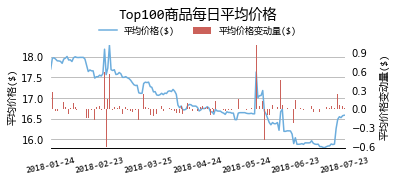

In [15]:
image = ImageFluctuation(data=data[u'平均价格($)'],
                        y2=data[u'平均价格变动量($)'],
                        labels=data[u'日期'],
                        title=u'Top100商品每日平均价格',
                        legend_name=[u'平均价格($)', 
                                     u'平均价格变动量($)'],
                        xticks_rotation=12 # 设置x轴ticks的倾斜角度为12度
                        )

image.init()
image.fig

### 手动设置Y轴取值范围

In [16]:
# image.fig.savefig('./source/twinx.png',  dpi=160, bbox_inches='tight')

### 作业

作为作业，可以自行构造一个双轴Bar形图